In [1]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

# Streamlit App
st.title("Customer Segmentation")
uploaded_file = st.file_uploader("Upload your dataset (CSV)", type="csv")

if uploaded_file:
    # Load dataset
    data = pd.read_csv(uploaded_file)
    st.write("Dataset:")
    st.write(data.head())

    # Feature Selection
    features = st.multiselect("Select Features for Clustering:", options=data.columns.tolist())
    if len(features) < 2:
        st.warning("Please select at least two features.")
    else:
        # Preprocessing: Scaling
        scaler = StandardScaler()
        scaled_data = scaler.fit_transform(data[features])

        # Dimensionality Reduction with PCA
        n_components = st.slider("Number of PCA Components:", 2, 3, 2)
        pca = PCA(n_components=n_components)
        pca_data = pca.fit_transform(scaled_data)
        st.write(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

        # Clustering Algorithm Selection
        clustering_algo = st.selectbox("Select Clustering Algorithm:", ["K-means", "DBSCAN"])

        if clustering_algo == "K-means":
            # K-means Clustering
            n_clusters = st.slider("Number of Clusters:", 2, 10, 3)
            kmeans = KMeans(n_clusters=n_clusters, random_state=42)
            labels = kmeans.fit_predict(pca_data)

            # Silhouette Score
            silhouette = silhouette_score(pca_data, labels)
            st.write(f"Silhouette Score: {silhouette}")

        elif clustering_algo == "DBSCAN":
            # DBSCAN Clustering
            eps = st.slider("Epsilon (eps):", 0.1, 5.0, 0.5)
            min_samples = st.slider("Minimum Samples:", 1, 20, 5)
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(pca_data)

            # Silhouette Score (if applicable)
            if len(set(labels)) > 1:  # DBSCAN might result in a single cluster
                silhouette = silhouette_score(pca_data, labels)
                st.write(f"Silhouette Score: {silhouette}")
            else:
                st.warning("DBSCAN resulted in a single cluster; Silhouette Score is not applicable.")

        # Visualizations
        st.subheader("Cluster Visualization")
        
        # 2D Plot
        st.write("2D Visualization:")
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=labels, palette="viridis")
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.title("2D Cluster Visualization")
        st.pyplot(plt)

        # 3D Plot (if 3 components)
        if n_components == 3:
            st.write("3D Visualization:")
            fig = plt.figure(figsize=(10, 7))
            ax = fig.add_subplot(111, projection='3d')
            scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=labels, cmap='viridis')
            ax.set_xlabel("PCA Component 1")
            ax.set_ylabel("PCA Component 2")
            ax.set_zlabel("PCA Component 3")
            plt.title("3D Cluster Visualization")
            st.pyplot(fig)

        # Cluster Summary
        st.subheader("Cluster Summary")
        cluster_summary = pd.DataFrame({'Cluster': labels})
        for i, feature in enumerate(features):
            cluster_summary[feature] = data[feature]
        st.write(cluster_summary.groupby('Cluster').mean())


2024-12-13 21:15:15.749 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 21:15:17.045 
  command:

    streamlit run C:\Users\Mostafa Samir\AppData\Local\Programs\Python\Python312\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-12-13 21:15:17.047 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 21:15:17.049 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 21:15:17.049 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 21:15:17.049 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-13 21:15:17.053 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-12-1

In [2]:
streamlit run main.py

SyntaxError: invalid syntax (1465090008.py, line 1)

In [22]:
import pandas as pd

# Load your dataset
file_path = 'Mall_Customers.csv' 
data = pd.read_csv(file_path)


In [23]:
# Dataset Overview
def dataset_overview(data):
    print("Dataset Overview:")
    print(f"Number of Records: {data.shape[0]}")
    print(f"Number of Columns: {data.shape[1]}")
    print(data.info())

# Statistical Summary
def statistical_summary(data):
    print("\nStatistical Summary:")
    print(data.describe())

dataset_overview(data)
statistical_summary(data)


Dataset Overview:
Number of Records: 200
Number of Columns: 5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

Statistical Summary:
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Encode Gender column
data['Gender'] = le.fit_transform(data['Gender'])


Distribution Analysis:
        Gender        Age  Annual Income (k$)  Spending Score (1-100)
mean  0.440000  38.850000           60.560000               50.200000
std   0.497633  13.969007           26.264721               25.823522
min   0.000000  18.000000           15.000000                1.000000
max   1.000000  70.000000          137.000000               99.000000
skew  0.243578   0.485569            0.321843               -0.047220
kurt -1.960375  -0.671573           -0.098487               -0.826629


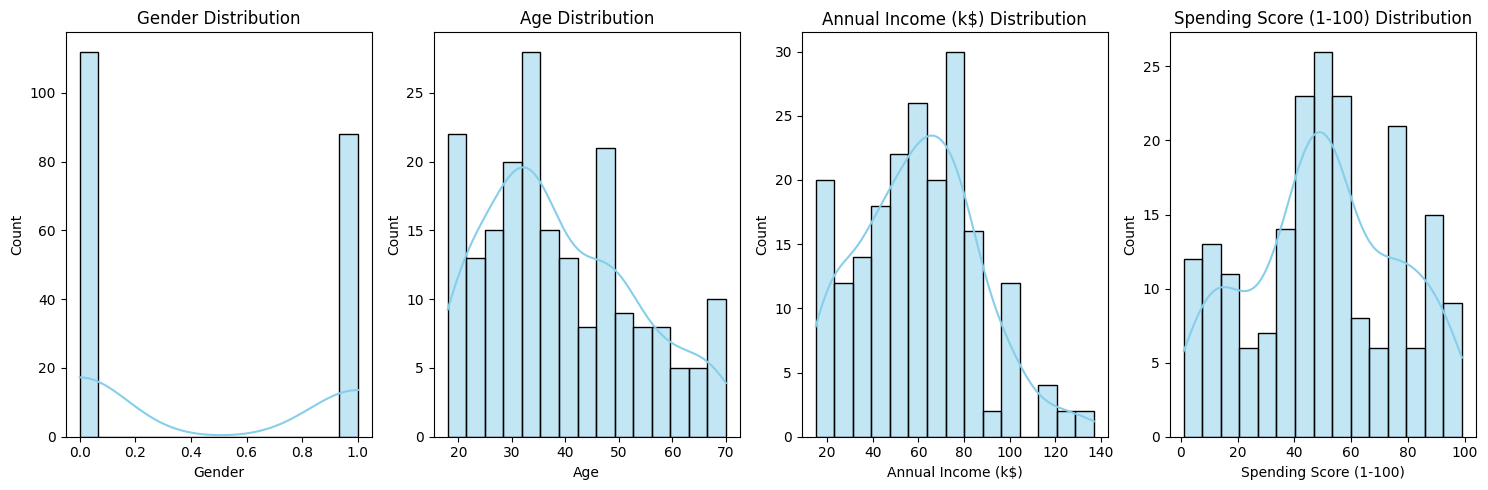

In [36]:
# Analyze Distributions of Numerical Variables
def distribution_analysis(data, numerical_columns):
    distribution_analysis = data[numerical_columns].agg(['mean', 'std', 'min', 'max', 'skew', 'kurt'])
    print("\nDistribution Analysis:")
    print(distribution_analysis)

# Visualize distributions
def visualize_distributions(data, numerical_columns):
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(numerical_columns):
        plt.subplot(1, 4, i + 1)
        sns.histplot(data[col], kde=True, bins=15, color='skyblue')
        plt.title(f"{col} Distribution")
    plt.tight_layout()
    plt.show()

numerical_columns = ['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']
distribution_analysis(data, numerical_columns)
visualize_distributions(data, numerical_columns)



Correlation Matrix:
                          Gender       Age  Annual Income (k$)  \
Gender                  1.000000  0.060867            0.056410   
Age                     0.060867  1.000000           -0.012398   
Annual Income (k$)      0.056410 -0.012398            1.000000   
Spending Score (1-100) -0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
Gender                               -0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


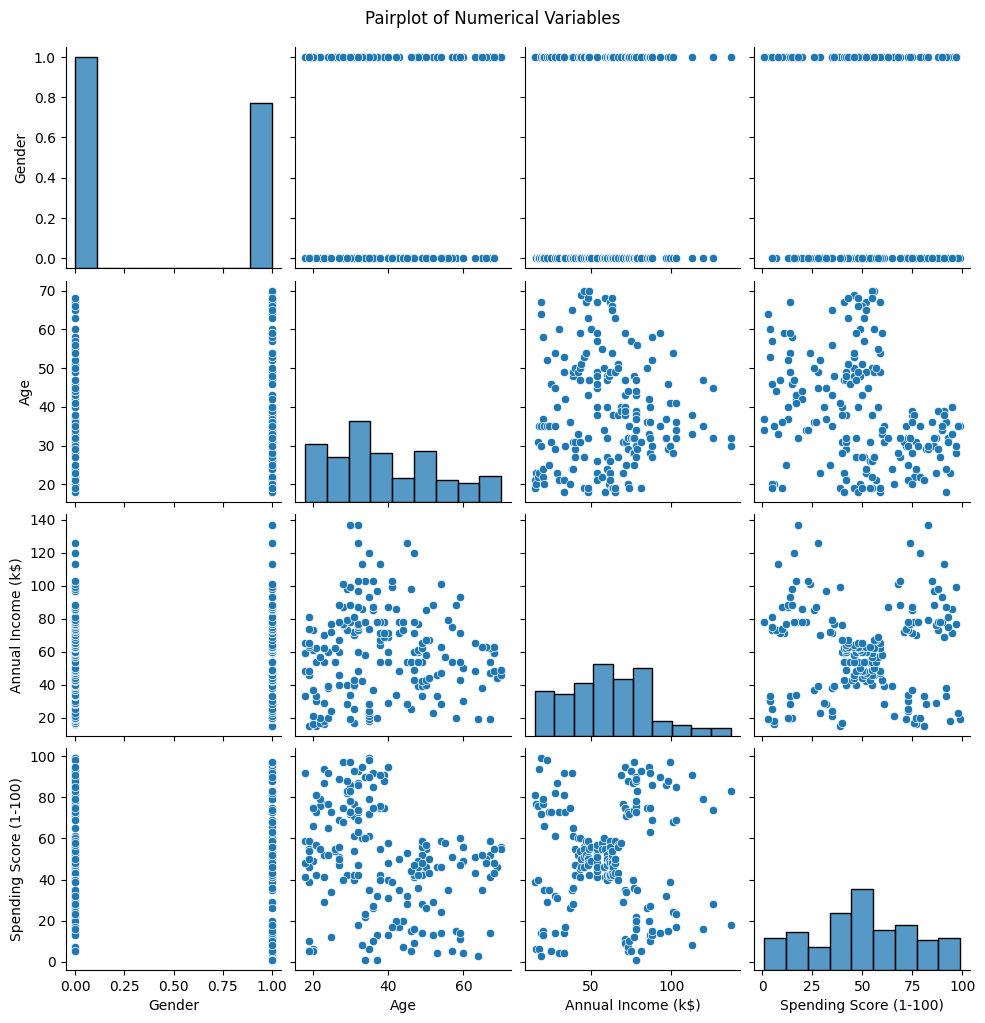

In [37]:
# Examine Relationships Between Variables
def correlation_analysis(data, numerical_columns):
    correlation_matrix = data[numerical_columns].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix)

def plot_pairplot(data, numerical_columns):
    sns.pairplot(data[numerical_columns])
    plt.suptitle("Pairplot of Numerical Variables", y=1.02)
    plt.show()

correlation_analysis(data, numerical_columns)
plot_pairplot(data, numerical_columns)



Outliers in Gender:
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []

Outliers in Age:
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []

Outliers in Annual Income (k$):
     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
198         199       1   32                 137                      18
199         200       1   30                 137                      83

Outliers in Spending Score (1-100):
Empty DataFrame
Columns: [CustomerID, Gender, Age, Annual Income (k$), Spending Score (1-100)]
Index: []


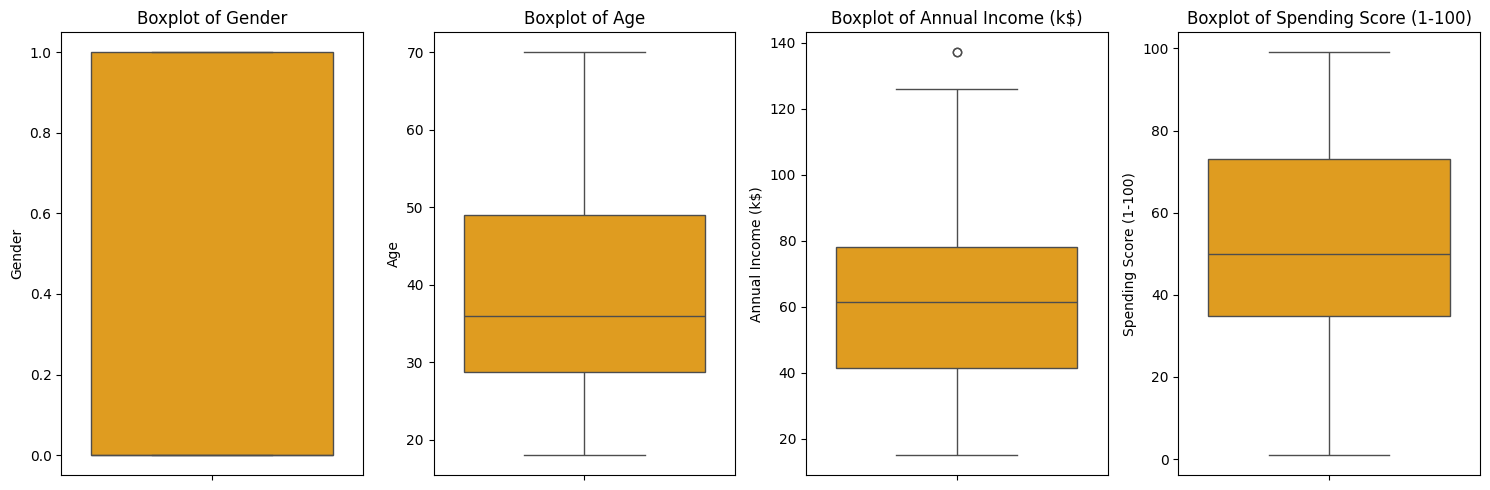

In [39]:
# Outlier Detection using IQR
def outlier_detection(data, numerical_columns):
    outliers = {}
    for col in numerical_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[col] = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f"\nOutliers in {col}:")
        print(outliers[col])
    return outliers

# Boxplots to visualize outliers
def plot_boxplots(data, numerical_columns):
    plt.figure(figsize=(15, 5))
    for i, col in enumerate(numerical_columns):
        plt.subplot(1, 4, i + 1)
        sns.boxplot(data[col], color='orange')
        plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

outliers = outlier_detection(data, numerical_columns)
plot_boxplots(data, numerical_columns)


In [40]:
# Handle Outliers
# Option 1: Remove Outliers
def remove_outliers(data, numerical_columns):
    filtered_data = data.copy()
    for col in numerical_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]
    return filtered_data

# Option 2: Cap Outliers
def cap_outliers(data, numerical_columns):
    capped_data = data.copy()
    for col in numerical_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        capped_data[col] = capped_data[col].apply(lambda x: min(max(x, lower_bound), upper_bound))
    return capped_data

filtered_data = remove_outliers(data, numerical_columns)
capped_data = cap_outliers(data, numerical_columns)

# Display data after removing and capping outliers
print("\nData after removing outliers:")
print(filtered_data.describe())
print("\nData after capping outliers:")
print(capped_data.describe())



Data after removing outliers:
       CustomerID      Gender         Age  Annual Income (k$)  \
count  198.000000  198.000000  198.000000          198.000000   
mean    99.500000    0.434343   38.929293           59.787879   
std     57.301832    0.496927   14.016852           25.237259   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.250000    0.000000   28.250000           40.500000   
50%     99.500000    0.000000   36.000000           61.000000   
75%    148.750000    1.000000   49.000000           77.750000   
max    198.000000    1.000000   70.000000          126.000000   

       Spending Score (1-100)  
count              198.000000  
mean                50.196970  
std                 25.746846  
min                  1.000000  
25%                 35.000000  
50%                 50.000000  
75%                 72.750000  
max                 99.000000  

Data after capping outliers:
       CustomerID      Gender         Age  Annual Income (k$)  \


In [41]:
# Save processed datasets
def save_processed_data(filtered_data, capped_data):
    filtered_data.to_csv('Filtered_Mall_Customers.csv', index=False)
    capped_data.to_csv('Capped_Mall_Customers.csv', index=False)
    print("\nProcessed datasets saved as 'Filtered_Mall_Customers.csv' and 'Capped_Mall_Customers.csv'")

save_processed_data(filtered_data, capped_data)



Processed datasets saved as 'Filtered_Mall_Customers.csv' and 'Capped_Mall_Customers.csv'


In [42]:
# Feature selection
features = ['Gender','Age', 'Annual Income (k$)', 'Spending Score (1-100)']
selected_data = filtered_data[features]

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(selected_data)

print("Data preprocessing completed.")

Data preprocessing completed.


In [43]:
# Step 2: PCA for Dimensionality Reduction
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
print(f"Explained Variance Ratio: {pca.explained_variance_ratio_}")

print("PCA completed.")

Explained Variance Ratio: [0.33807564 0.25402715 0.24035502]
PCA completed.


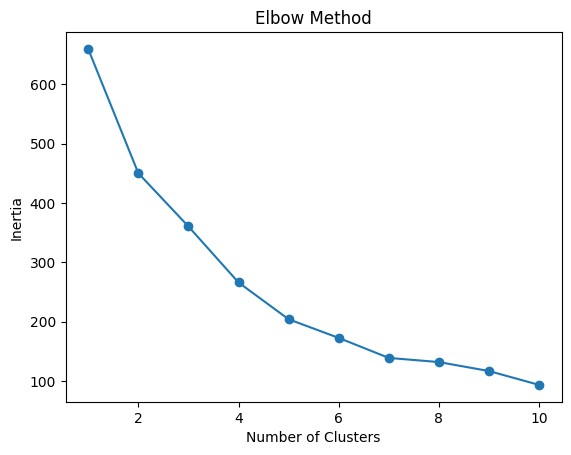

K-means clustering completed.


In [44]:
# Step 3: K-means Clustering
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Apply K-means with optimal clusters
optimal_clusters = 3  # Based on the elbow plot
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_data)

print("K-means clustering completed.")


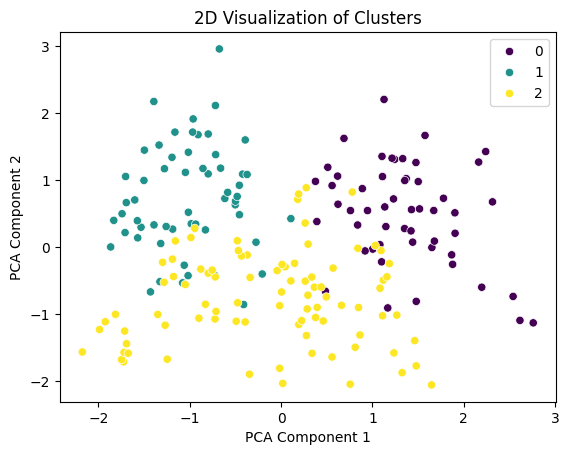

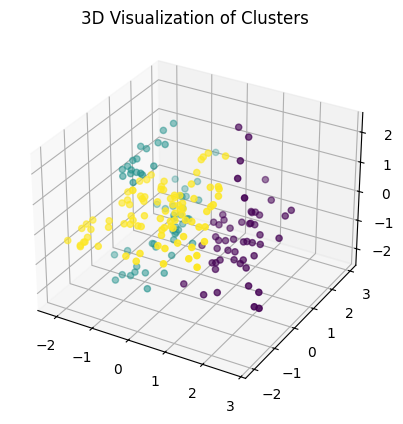

In [45]:
# Step 4: 2D and 3D Visualization
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 2D Scatter Plot
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=kmeans_labels, palette='viridis')
plt.title("2D Visualization of Clusters")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=kmeans_labels, cmap='viridis')
plt.title("3D Visualization of Clusters")
plt.show()


In [46]:
# Step 5: DBSCAN Clustering and Comparison
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Apply DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(pca_data)

# Compare with Silhouette Score
kmeans_score = silhouette_score(pca_data, kmeans_labels)
dbscan_score = silhouette_score(pca_data, dbscan_labels)

print(f"K-means Silhouette Score: {kmeans_score}")
print(f"DBSCAN Silhouette Score: {dbscan_score}")


K-means Silhouette Score: 0.32096602166390964
DBSCAN Silhouette Score: 0.26124001995030866
